In [65]:
import jumpSearch 
import matplotlib.pyplot as plt
import numpy as np
import random as rand
import time

In [66]:
def benchmark_heap(lst):
    times = [] #Used to store the duration time
    n_trials = 10 #Number of trials for each list
    for i in range(n_trials):
        copy = lst[:] #Duplicate list was made so that the order isn't altered
        start = time.clock()
        sorting.build_max_heap(copy)
        end = time.clock()
        elapsed = end - start
        times.append(elapsed)
    avg = np.mean(times) #Calculates the average run time
    return avg

In [67]:
def benchmark_heap_insert(lst):
    times = [] #Used to store the duration time
    n_trials = 10 #Number of trials for each list
    for i in range(n_trials):
        copy = lst[:] #Duplicate list was made so that the order isn't altered
        newLst = []#New lst made from inserting elements
        start = time.clock()
        for i in copy:
            sorting.max_heap_insert(newLst, i)
        end = time.clock()
        elapsed = end - start
        times.append(elapsed)
    avg = np.mean(times) #Calculates the average run time
    return avg

In [68]:
def benchmark_heap_extract(lst):
    times = [] #Used to store the duration time
    n_trials = 10 #Number of trials for each list
    for i in range(n_trials):
        copy = lst[:] #Duplicate list was made so that the order isn't altered
        start = time.clock()
        while copy:
            sorting.heap_extract_max(copy)
        end = time.clock()
        elapsed = end - start
        times.append(elapsed)
    avg = np.mean(times) #Calculates the average run time
    return avg

In [72]:
def plotHeap(trials, result_shuffle, result_sort, result_reverse):
    #Creates a plot of all list types against each other
    plt.plot(np.log10(trials), result_shuffle, label="Shuffled List")
    plt.plot(np.log10(trials), result_sort, label="Sorted List")
    plt.plot(np.log10(trials), result_reverse, label="Reversed List")
    plt.xlabel("List Size (log10)", fontsize=12)
    plt.ylabel("Running Time (s)", fontsize=12)
    plt.title("Heap Sort: List Size vs. Run Time", fontsize=14)
    plt.legend()
    plt.show()

In [73]:
def plotHeap_insert(trials, r_sf, r_s, r_r, r_i_sf, r_i_s, r_i_r):
    #Creats a plot of the shuffled list (inserting element vs making at once)
    plt.plot(np.log10(trials), r_sf, label="At Once")
    plt.plot(np.log10(trials), r_i_sf, label="Inserted")
    plt.xlabel("List Size (log10)", fontsize=12)
    plt.ylabel("Running Time (s)", fontsize=12)
    plt.title("Shuffled List: Making Heap at Once vs Inserting Each Element", fontsize=14)
    plt.legend()
    plt.show()

    #Creats a plot of the sorted list (inserting element vs making at once)
    plt.plot(np.log10(trials), r_s, label="At Once")
    plt.plot(np.log10(trials), r_i_s, label="Inserted")
    plt.xlabel("List Size (log10)", fontsize=12)
    plt.ylabel("Running Time (s)", fontsize=12)
    plt.title("Sorted List: Making Heap at Once vs Inserting Each Element", fontsize=14)
    plt.legend()
    plt.show()

    #Creats a plot of the reverse sorted list (inserting element vs making at once)
    plt.plot(np.log10(trials), r_r, label="At Once")
    plt.plot(np.log10(trials), r_i_r, label="Inserted")
    plt.xlabel("List Size (log10)", fontsize=12)
    plt.ylabel("Running Time (s)", fontsize=12)
    plt.title("Reverse Sorted List: Making Heap at Once vs Inserting Each Element", fontsize=14)
    plt.legend()
    plt.show()


In [70]:
def plotHeap_extract(trials, r_i_sf, r_e_sf):
    #Creates a plot for the extraction vs insertion time of heaps
    plt.plot(np.log10(trials), r_i_sf, label="Inserted")
    plt.plot(np.log10(trials), r_e_sf, label="Extracted")
    plt.xlabel("List Size (log10)", fontsize=12)
    plt.ylabel("Running Time (s)", fontsize=12)
    plt.title("Shuffled List: Inserting Elements vs Extracting Max Value", fontsize=14)
    plt.legend()
    plt.show()

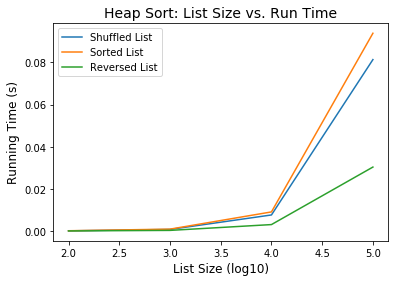

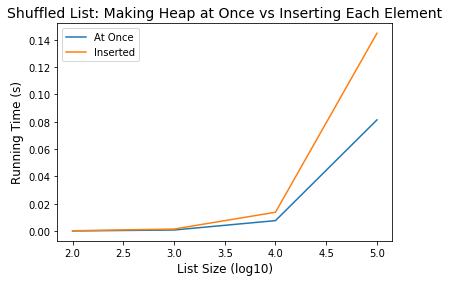

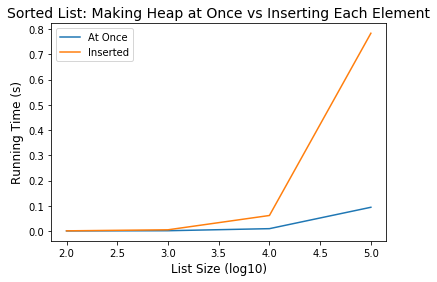

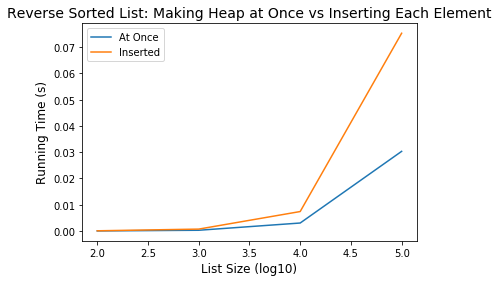

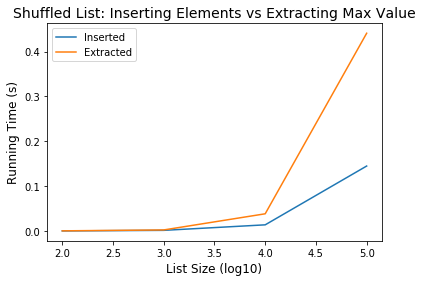

In [74]:
trials = [100, 1000, 10000, 100000] #List Sizes
lst = [] 
r_sf = [] #result shuffle 
r_s = [] #result sorted
r_r = [] #result reverse
r_i_sf = [] #result insert shuffled
r_i_s = [] #result insert sorted
r_i_r = [] #result insert reverse
r_e_sf = [] #result extract shuffled

for length in trials: #Iterates so long as there are more lists to do
    lst = [rand.random() for i in range(length)] #Creates a list of random values
    
    #Shuffled List
    rand.shuffle(lst) 
    r_sf.append(benchmark_heap(lst)) #Making heap all at once testbench 
    r_i_sf.append(benchmark_heap_insert(lst)) #Making heap by inserting elements indiv testbench
    r_e_sf.append(benchmark_heap_extract(lst))#Testbench for extracting largests val in heap
    
    #Sorted List Smallest->Largest
    lst.sort()
    r_s.append(benchmark_heap(lst)) #Calls the benchmark and stores average time
    r_i_s.append(benchmark_heap_insert(lst)) #Calls the benchmark and stores average time+
    
    #Reverse Order List Largest->Smallest
    lst.reverse()
    r_r.append(benchmark_heap(lst)) #Calls the benchmark and stores average time
    r_i_r.append(benchmark_heap_insert(lst)) #Calls the benchmark and stores average time

plotHeap(trials, r_sf, r_s, r_r)
plotHeap_insert(trials, r_sf, r_s, r_r, r_i_sf, r_i_s, r_i_r)
plotHeap_extract(trials, r_i_sf, r_e_sf)